데이터 탐색(시각화-어떤 데이터들인지, 어떤 데이터로 무엇을 어떻게 처리할까?)<p> 
-> split <p>
-> Modeling<p>
-> confusion Matrix<p>
-> CEE<p>
-> Pruning

# 1, 모델 탐색화

In [6]:
import pandas as pd

DF = pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/product.csv')
DF

,Date,meanPriceEach,totalOrder,orderType_1,orderType_2,orderType_3,totalBundle,bundleType_1,bundleType_2,customerType,FY,Country
0,2015-01-04,1.56,58065.35,10049.66,25228.37,3672.89,19114.43,17280.89,1833.54,Online,2015,25
1,2015-01-04,1.10,2578275.12,575245.44,1311502.53,181058.65,510468.50,429166.89,80986.81,Offline,2015,25
2,2015-01-11,1.17,2335986.11,560119.16,1032606.49,191515.19,551745.27,465764.93,85966.27,Offline,2015,25
3,2015-01-11,1.52,65483.08,14570.74,30445.75,3170.11,17296.48,16715.45,581.03,Online,2015,25
4,2015-01-18,1.65,52559.10,11415.28,25306.56,3345.08,12492.18,10971.43,1520.75,Online,2015,25
...,...,...,...,...,...,...,...,...,...,...,...,...
15004,2017-08-13,1.55,286679.02,64304.67,33590.30,27839.54,160944.51,137133.56,10425.92,Offline,2017,13
15005,2017-08-20,1.25,388250.81,113908.85,34529.25,26555.78,213256.93,191985.02,8146.65,Offline,2017,13
15006,2017-08-20,1.59,20129.12,544.70,3347.81,0.00,16161.90,12819.22,3342.68,Online,2017,13
15007,2017-08-27,1.64,18415.34,391.46,2392.09,0.00,15616.38,12233.06,3383.32,Online,2017,13


In [7]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15009 entries, 0 to 15008
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           15009 non-null  object 
 1   meanPriceEach  15009 non-null  float64
 2   totalOrder     15009 non-null  float64
 3   orderType_1    15009 non-null  float64
 4   orderType_2    15009 non-null  float64
 5   orderType_3    15009 non-null  float64
 6   totalBundle    15009 non-null  float64
 7   bundleType_1   15009 non-null  float64
 8   bundleType_2   15009 non-null  float64
 9   customerType   15009 non-null  object 
 10  FY             15009 non-null  int64  
 11  Country        15009 non-null  int64  
dtypes: float64(8), int64(2), object(2)
memory usage: 1.4+ MB


## 1) Feature importance

### (1) Modeling - 
import DecisionTreeClassifier

In [8]:
x = DF[['meanPriceEach','totalOrder','orderType_1','orderType_2','orderType_3','totalBundle','bundleType_1','bundleType_2','FY','Country']]
y = DF['customerType']

from sklearn.tree import DecisionTreeClassifier

Model = DecisionTreeClassifier(random_state = 2045)
Model.fit(x,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2045, splitter='best')

### (2) Feature Importance

In [9]:
Model.feature_importances_

array([3.46238454e-02, 7.16605574e-01, 4.23969254e-02, 4.09633868e-02,
       8.48747688e-02, 2.66506773e-04, 1.12384047e-02, 4.96842793e-03,
       2.61989709e-04, 6.38001706e-02])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


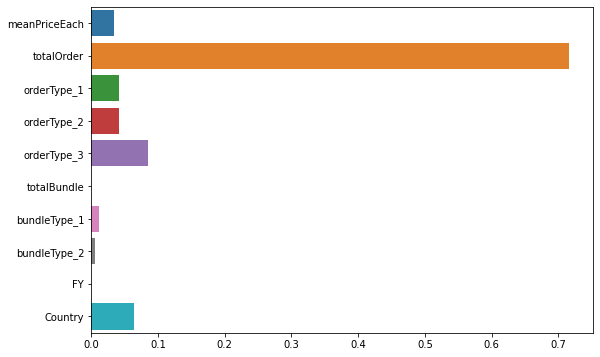

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9,6))
sns.barplot(Model.feature_importances_,
            ['meanPriceEach','totalOrder','orderType_1','orderType_2','orderType_3','totalBundle','bundleType_1','bundleType_2','FY','Country'])
plt.show()

## 2) 시각화 그래프

### (1) pairplot

In [14]:
DF = pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/product.csv')

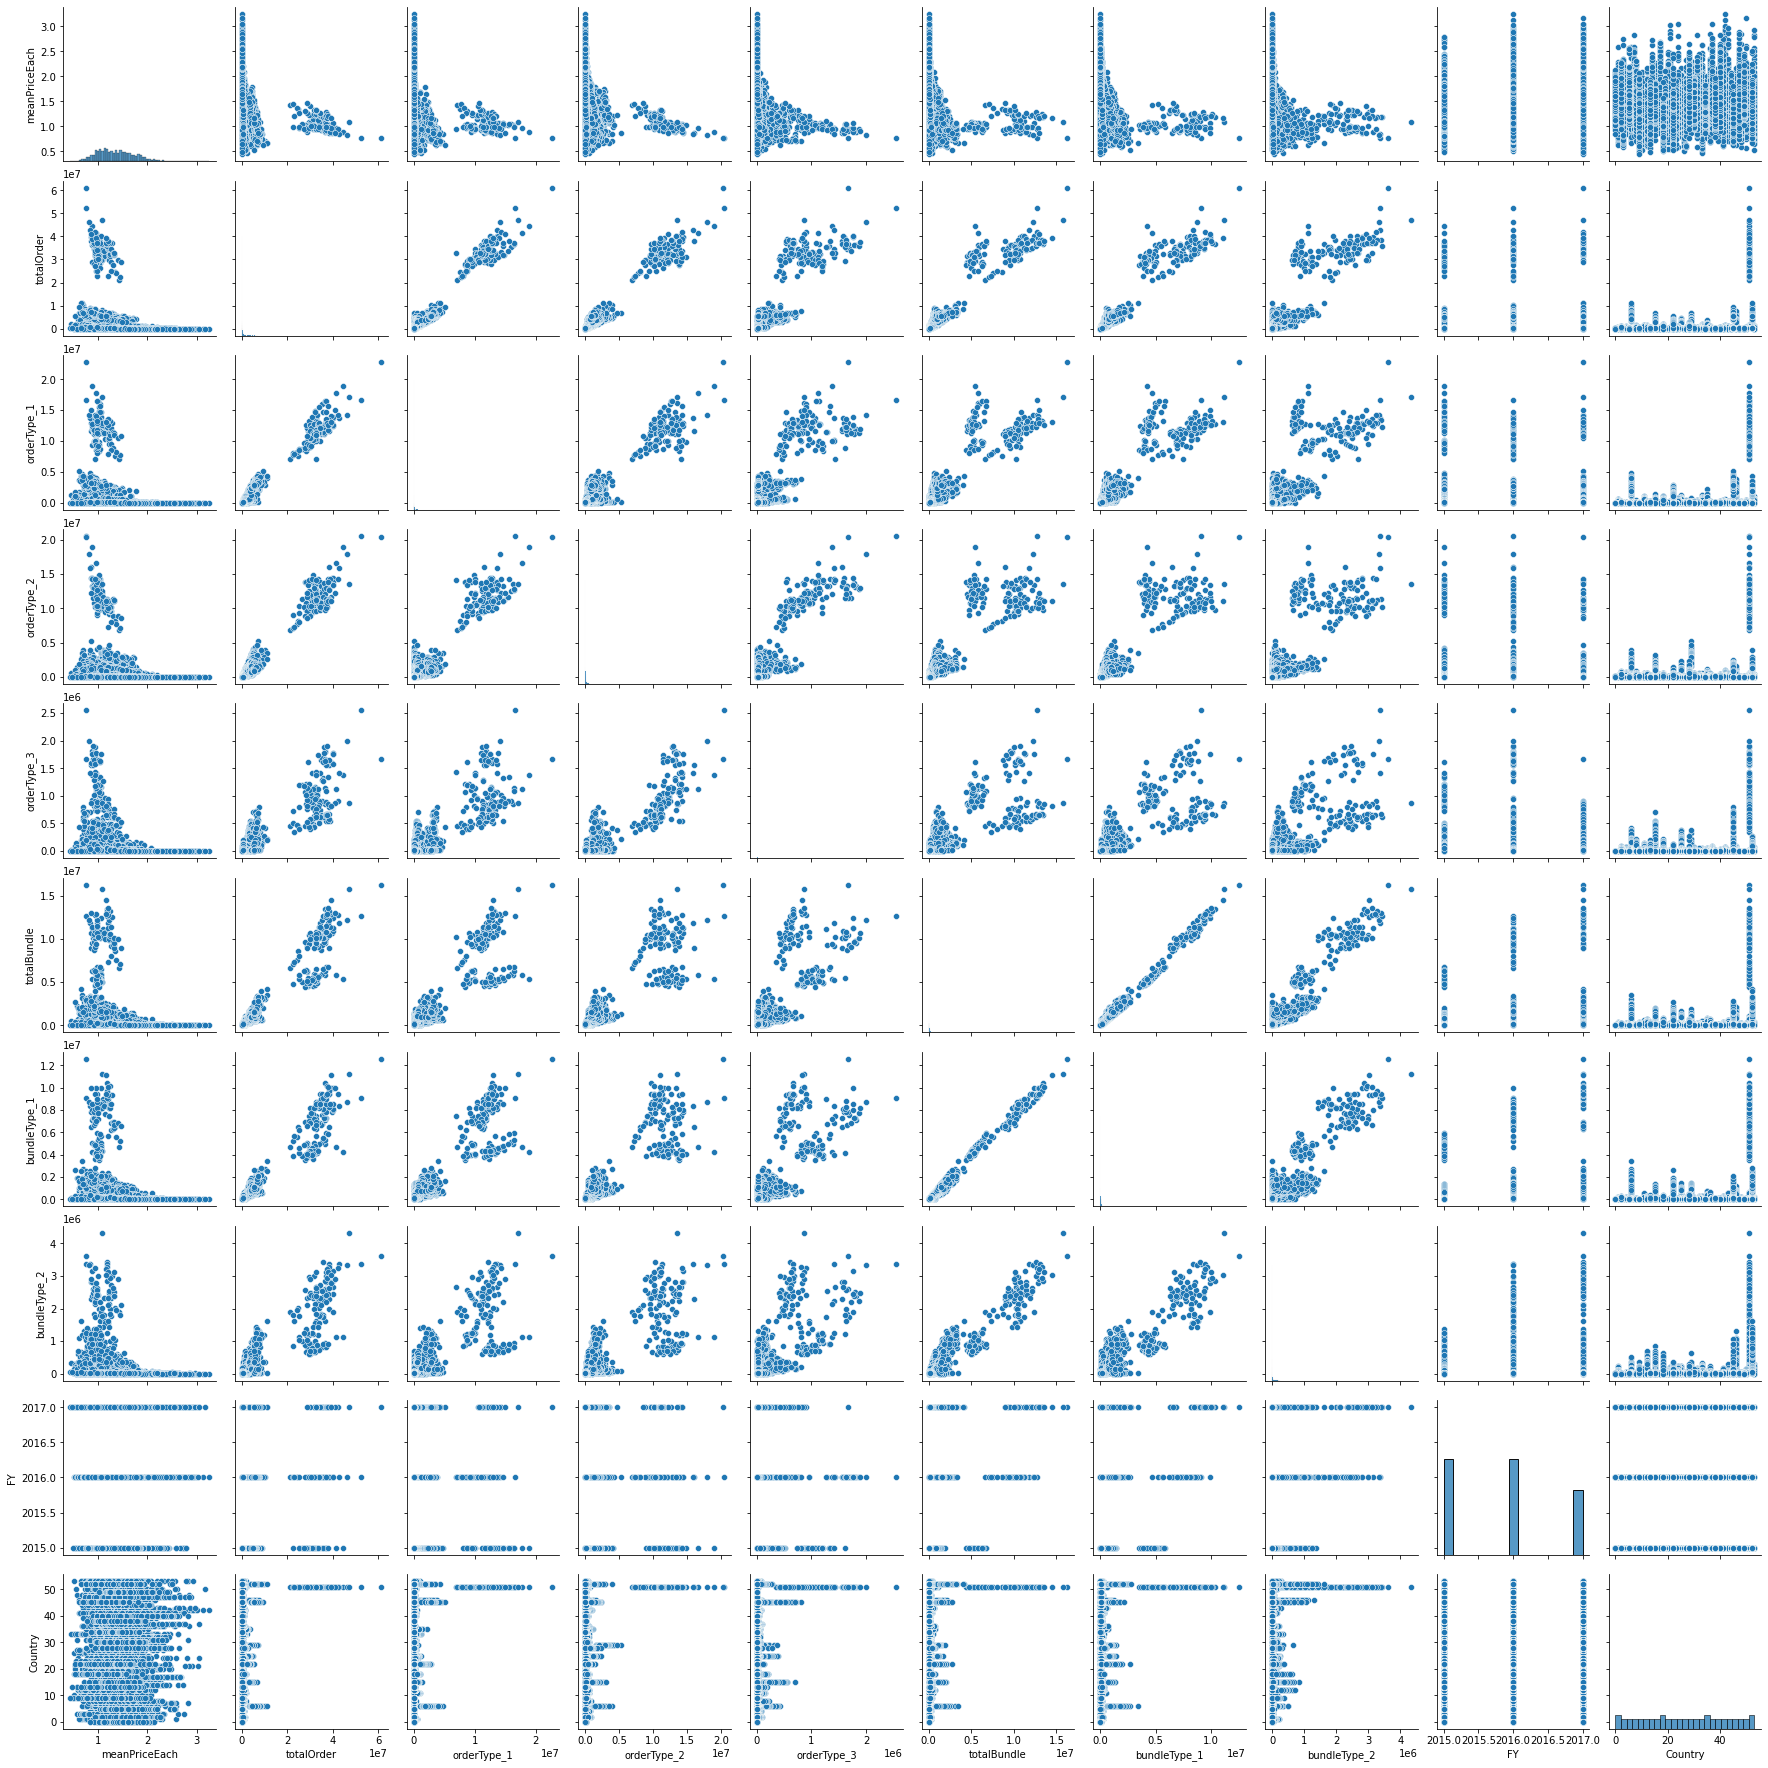

In [15]:
sns.pairplot(DF)
plt.show()

### (2) boxplot

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


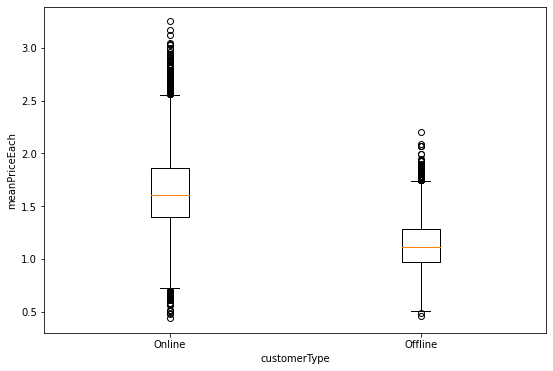

In [32]:
plt.figure(figsize=(9,6))
plt.boxplot([DF[DF.customerType == 'Online'].meanPriceEach,
             DF[DF.customerType == 'Offline'].meanPriceEach],
            labels = ['Online', 'Offline'])
plt.xlabel('customerType')
plt.ylabel('meanPriceEach')
plt.show()


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


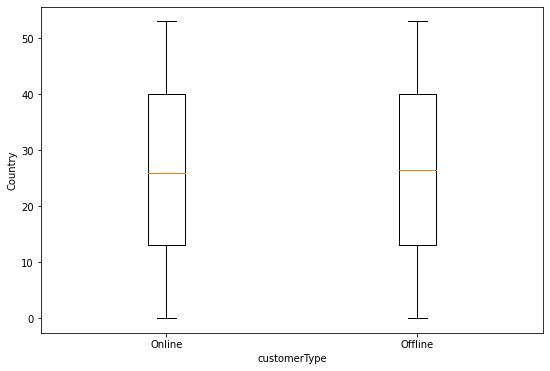

In [33]:
plt.figure(figsize=(9,6))
plt.boxplot([DF[DF.customerType == 'Online'].Country,
             DF[DF.customerType == 'Offline'].Country],
            labels = ['Online', 'Offline'])
plt.xlabel('customerType')
plt.ylabel('Country')
plt.show()


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


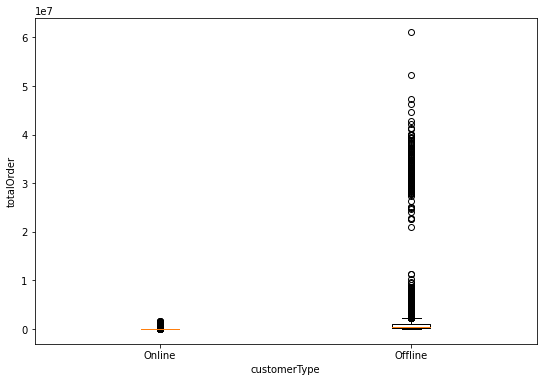

In [34]:
# scaling 해볼 것

plt.figure(figsize=(9,6))
plt.boxplot([DF[DF.customerType == 'Online'].totalOrder,
             DF[DF.customerType == 'Offline'].totalOrder],
            labels = ['Online', 'Offline'])
plt.xlabel('customerType')
plt.ylabel('totalOrder')
plt.show()


#### -scaling

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
totalorder = scaler.fit_transform(DF[['totalOrder']])
totalorder[:20]

array([[0.00094997],
       [0.04224162],
       [0.0382719 ],
       [0.0010715 ],
       [0.00085975],
       [0.03818741],
       [0.00089865],
       [0.0406449 ],
       [0.0011809 ],
       [0.06009652],
       [0.00105989],
       [0.04479316],
       [0.03966199],
       [0.00110969],
       [0.00124311],
       [0.04456935],
       [0.04159782],
       [0.00102   ],
       [0.03764149],
       [0.00119879]])

In [24]:
DF['totalorder'] = totalorder
DF.head(3)

,Date,meanPriceEach,totalOrder,orderType_1,orderType_2,orderType_3,totalBundle,bundleType_1,bundleType_2,customerType,FY,Country,totalorder
0,2015-01-04,1.56,58065.35,10049.66,25228.37,3672.89,19114.43,17280.89,1833.54,Online,2015,25,0.000950
1,2015-01-04,1.10,2578275.12,575245.44,1311502.53,181058.65,510468.50,429166.89,80986.81,Offline,2015,25,0.042242
2,2015-01-11,1.17,2335986.11,560119.16,1032606.49,191515.19,551745.27,465764.93,85966.27,Offline,2015,25,0.038272


#### -scaled _ boxplot

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


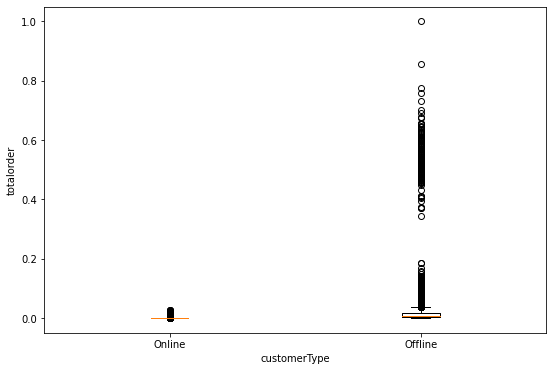

In [35]:
# scaling과는 별 상관없음

plt.figure(figsize=(9,6))
plt.boxplot([DF[DF.customerType == 'Online'].totalorder,
             DF[DF.customerType == 'Offline'].totalorder],
            labels = ['Online', 'Offline'])
plt.xlabel('customerType')
plt.ylabel('totalorder')
plt.show()

# 2, Decision Tree

## 1) customerType & totalOrder 관계

### (1) split - 7:3

In [36]:
x = DF[['totalOrder']]
y = DF[['customerType']]

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state = 2045)

print('Train Data : ', x_train.shape, y_train.shape)
print('Test Data : ', x_test.shape, y_test.shape)

Train Data :  (10506, 1) (10506, 1)
Test Data :  (4503, 1) (4503, 1)


### (2) Modeling

In [45]:
from sklearn.tree import DecisionTreeClassifier

Model_to = DecisionTreeClassifier()
Model_to.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### (3) Visualization - **graphviz**

In [46]:
from sklearn.tree import export_graphviz
import graphviz

graphviz.Source(export_graphviz(Model_to,
                                class_names = (['Online', 'Offline']),
                                feature_names = (['totalOrder']),
                                filled = True))

### (4) Test_Data에 적용

In [40]:
y_hat_to = Model_to.predict(x_test)
y_hat_to

array(['Online', 'Offline', 'Online', ..., 'Offline', 'Online', 'Online'],
      dtype=object)

### (5) Confusion Matrix

In [42]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat_to)

# online과 offline을 완전히 분리하지 못함

array([[1953,  274],
       [ 267, 2009]])

### (6) CEE - Accuracy, Precision, Recall

In [48]:
# positive = offline

from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy_score_to = accuracy_score(y_test, y_hat_to)
precision_score_to = precision_score(y_test, y_hat_to,  pos_label ='Offline')
recall_score_to = recall_score(y_test, y_hat_to, pos_label ='Offline')

print('accuracy_score : ', accuracy_score_to)
print('precision_score : ',precision_score_to)
print('recall_score :', recall_score_to)

accuracy_score :  0.8798578725294248
precision_score :  0.8797297297297297
recall_score : 0.8769645262685227


In [49]:
# positive = online

from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy_score_to = accuracy_score(y_test, y_hat_to)
precision_score_to = precision_score(y_test, y_hat_to,  pos_label ='Online')
recall_score_to = recall_score(y_test, y_hat_to, pos_label ='Online')

print('accuracy_score : ', accuracy_score_to)
print('precision_score : ',precision_score_to)
print('recall_score :', recall_score_to)

# positive가 바뀌어도 값이 바뀌지 않는 건.. 의사결정에 두개가 차이가 없다는 건가.

accuracy_score :  0.8798578725294248
precision_score :  0.8799824791940429
recall_score : 0.882688927943761


### (7) F1_score

In [55]:
from sklearn.metrics import f1_score

f1_score_to = f1_score(y_test, y_hat_to, pos_label='Online')
print('f1_score : ', f1_score_to)

f1_score :  0.8813336257951305


## 2) customerType & totalOrder = max_depth = 5, 10, 15

depth :  5
confusion Matrix :  [[2156   71]
 [ 308 1968]]
accuracy_score :  0.9158338885187652
precision_score :  0.875
recall_score : 0.9681185451279749
f1_score : 0.8783449516527998
------------------------------
depth :  10
confusion Matrix :  [[2118  109]
 [ 308 1968]]
accuracy_score :  0.9073950699533644
precision_score :  0.8730420445177246
recall_score : 0.9510552312528064
f1_score : 0.8783449516527998
------------------------------
depth :  15
confusion Matrix :  [[2058  169]
 [ 294 1982]]
accuracy_score :  0.8971796580057739
precision_score :  0.875
recall_score : 0.9241131567130669
f1_score : 0.8783449516527998
------------------------------


<Figure size 648x432 with 0 Axes>

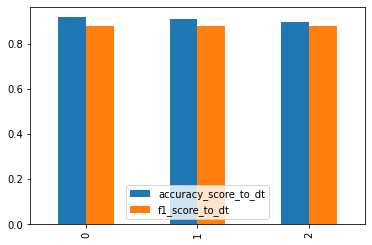

In [68]:
Model_to_dt = []
accuracy_score_to_dt = []
precision_score_to_dt = []
recall_score_to_dt = []
f1_score_to_dt = []

for depth in range(5,16,5):
  # max_depth를 for에서 range
  Model_to_dt = DecisionTreeClassifier(random_state=2045, max_depth=depth)
  Model_to_dt.fit(x_train, y_train)

  y_hat = Model_to_dt.predict(x_test)

  accuracy_score_to = accuracy_score(y_test, y_hat)
  precision_score_to = precision_score(y_test, y_hat,  pos_label ='Offline')
  recall_score_to = recall_score(y_test, y_hat, pos_label ='Offline')
  f1_score_to = f1_score(y_test, y_hat_to, pos_label='Offline')

  accuracy_score_to_dt.append(accuracy_score_to)
  precision_score_to_dt.append(precision_score_to)
  recall_score_to_dt.append(recall_score_to)
  f1_score_to_dt.append(f1_score_to)

  print('depth : ', depth )
  print('confusion Matrix : ', confusion_matrix(y_test, y_hat))
  print('accuracy_score : ', accuracy_score_to)
  print('precision_score : ',precision_score_to)
  print('recall_score :', recall_score_to)
  print('f1_score :', f1_score_to)
  print('-'*30)

x = pd.DataFrame({'accuracy_score_to_dt':accuracy_score_to_dt, 'f1_score_to_dt':f1_score_to_dt})
x[['accuracy_score_to_dt', 'f1_score_to_dt']].plot(kind='bar')
plt.show()